X.shape: (26, 2)


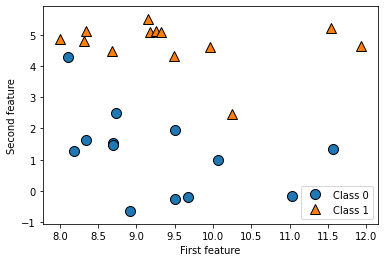

In [1]:
import mglearn
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape: {}'.format(X.shape))

Text(0, 0.5, 'Target')

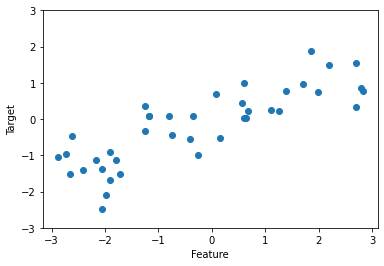

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f'cancer.keys(): \n{cancer.keys()}')

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(f'Shape od cancer data: {cancer.data.shape}')

Shape od cancer data: (569, 30)


In [6]:
import numpy as np
print('Sample counts per class:\n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print(f'Feature names: \n{cancer.feature_names}')

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(f'Data shape: {boston.data.shape}')

Data shape: (506, 13)


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [9]:
X, y  = mglearn.datasets.load_extended_boston()
print('X.shape: {}'.format(X.shape))

X.shape: (506, 104)


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

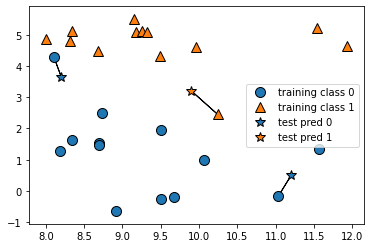

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

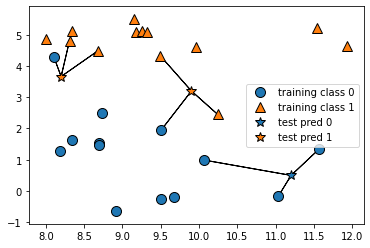

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y =mglearn.datasets.make_forge()

X_train ,X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print(f'Test set predictions: {clf.predict(X_test)}')

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print(f'Test set accuracy: {clf.score(X_test, y_test): .2f}')

Test set accuracy:  0.86


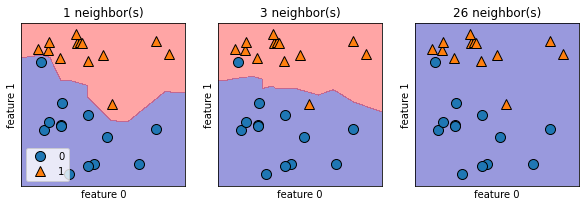

In [18]:
fig ,axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,26], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{n_neighbors} neighbor(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

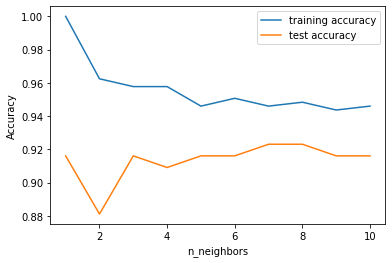

In [20]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train ,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

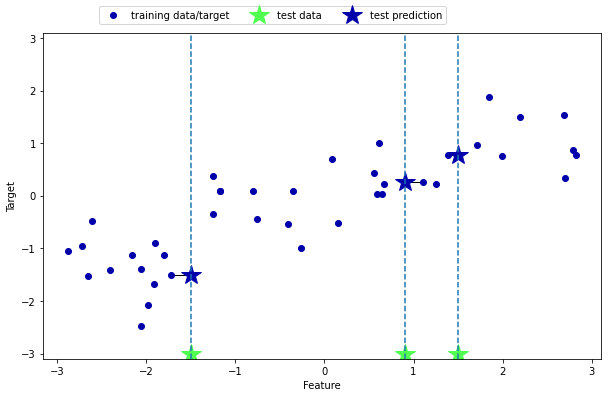

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

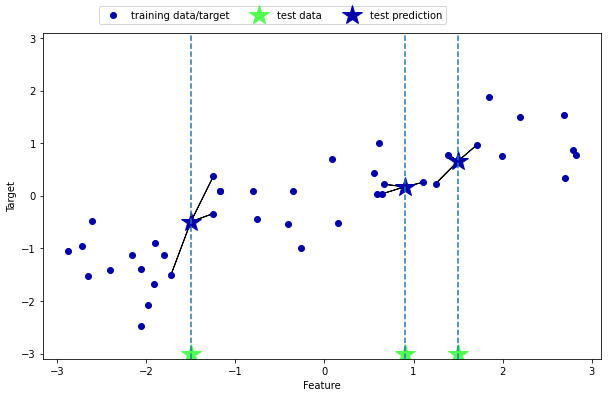

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
print(f'Test set predictions: \n{reg.predict(X_test)}')

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [26]:
print(f'Test set R^2: {reg.score(X_test, y_test):.2f}')

Test set R^2: 0.83


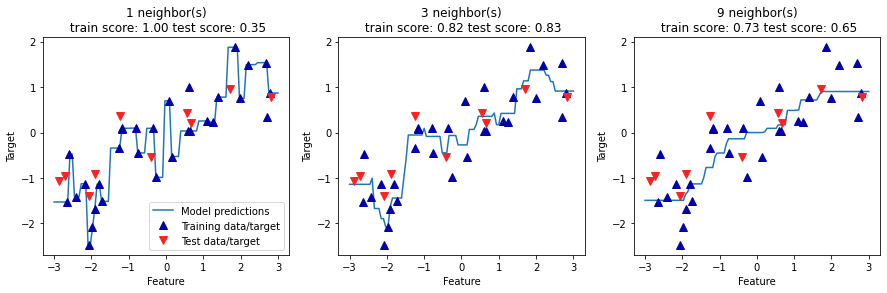

In [29]:
fig , axes= plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3, 3, 100).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,  y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,  y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)) 
    )
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions', 'Training data/target', 'Test data/target'], loc='best')

w[0]: 0.393906  b: -0.031804


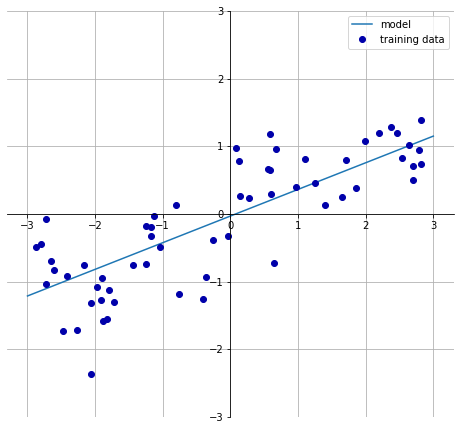

In [30]:
 mglearn.plots.plot_linear_regression_wave()

In [35]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
lr = LinearRegression().fit(X_train, y_train)

In [37]:
print(f'lr.coef_:{lr.coef_}')

lr.coef_:[0.39390555]


In [38]:
print(f'lr.intercept_: {lr.intercept_}')

lr.intercept_: -0.031804343026759746


In [39]:
print(f'Training set score: {lr.score(X_train, y_train):.2f}')

Training set score: 0.67


In [40]:
print(f'Test set score: {lr.score(X_test, y_test):.2f}')

Test set score: 0.66


In [41]:
X, y = mglearn.datasets.load_extended_boston()
X_train , X_test, y_train, y_test = train_test_split(X,y , random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [42]:
print(f'Training set score: {lr.score(X_train, y_train):.2f}')

Training set score: 0.95


In [43]:
print(f'Test set score: {lr.score(X_test, y_test):.2f}')

Test set score: 0.61


In [44]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(f'Training set score: {ridge.score(X_train, y_train)}')
print(f'Test set score: {ridge.score(X_test, y_test)}')

Training set score: 0.8857966585170941
Test set score: 0.7527683481744752


In [45]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(f'Training set score: {ridge10.score(X_train, y_train):.2f}')
print(f'Test set score: {ridge10.score(X_test, y_test):.2f}')

Training set score: 0.79
Test set score: 0.64


In [46]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'Training set score: {ridge01.score(X_train, y_train)}')
print(f'Test set score: {ridge01.score(X_test, y_test)}')

Training set score: 0.928227368500199
Test set score: 0.7722067936479817


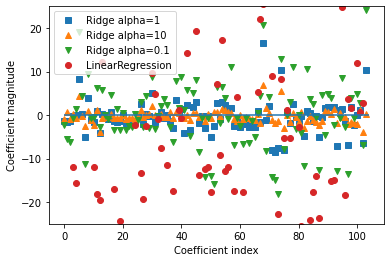

In [47]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

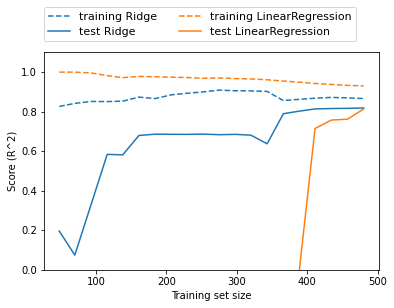

In [48]:
mglearn.plots.plot_ridge_n_samples()

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(f'Training set score: {lasso.score(X_train, y_train)}')
print(f'Test set score: {lasso.score(X_test, y_test)}')
print(f'Number of  features used: {np.sum(lasso.coef_ != 0)}')

Training set score: 0.29323768991114607
Test set score: 0.20937503255272294
Number of  features used: 4


In [50]:
lasso001 = Lasso(alpha=0.01, max_iter =100000).fit(X_train, y_train)
print(f'Training set score: {lasso001.score(X_train, y_train)}')
print(f'Test set score: {lasso001.score(X_test, y_test)}')
print(f'Number of features used: {np.sum(lasso001.coef_ != 0)}')

Training set score: 0.8962226511086497
Test set score: 0.7656571174549982
Number of features used: 33


In [51]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print(f'Training set score: {lasso00001.score(X_train, y_train)}')
print(f'Test set score: {lasso00001.score(X_test, y_test)}')
print(f'Number of features used: {np.sum(lasso00001.coef_ !=0)}')

Training set score: 0.9507158754515463
Test set score: 0.6437467421272821
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

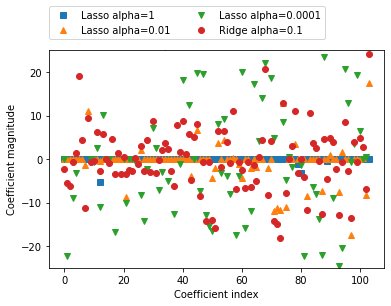

In [54]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


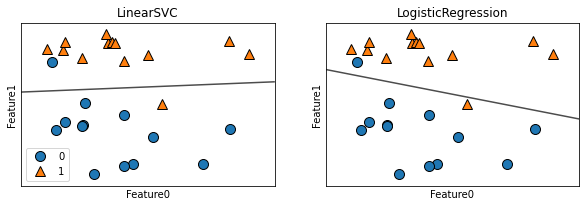

In [56]:
from  sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf= model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('Feature0')
    ax.set_ylabel('Feature1')
axes[0].legend()

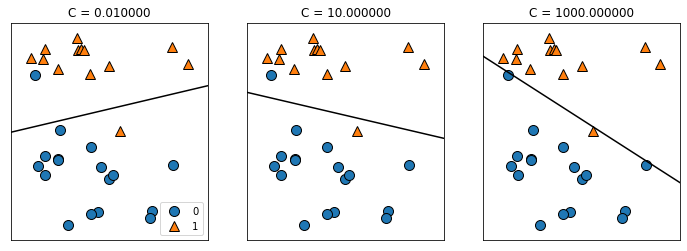

In [57]:
mglearn.plots.plot_linear_svc_regularization()

In [61]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train , X_test, y_train , y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print(f'Train set score: {logreg.score(X_train, y_train)}')
print(f'Test set score: {logreg.score(X_test, y_test)}')

Train set score: 0.9460093896713615
Test set score: 0.958041958041958


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(f'Training set score: {logreg100.score(X_train, y_train)}')
print(f'Test set score: {logreg100.score(X_test, y_test)}')

Training set score: 0.9436619718309859
Test set score: 0.951048951048951


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(f'Training set score: {logreg001.score(X_train, y_train)}')
print(f'Test set score: {logreg001.score(X_test, y_test)}')

Training set score: 0.9342723004694836
Test set score: 0.9300699300699301


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


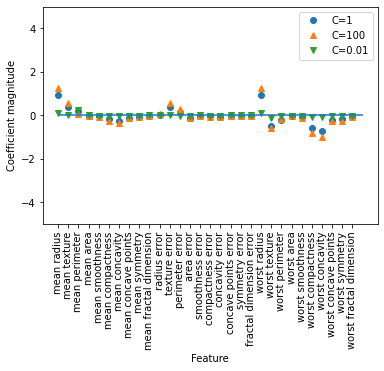

In [63]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


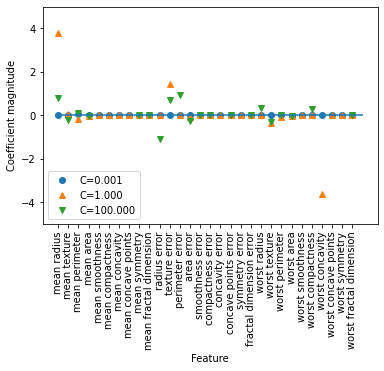

In [66]:
for  C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty='l1').fit(X_train, y_train)
    print(f'Training accuracy of l1 logreg with C={C:.3f}: {lr_l1.score(X_train, y_train):.2f}')
    print(f'Test accuracy of l1 logreg with C={C:.3f}: {lr_l1.score(X_test, y_test):.2f}')
    plt.plot(lr_l1.coef_.T, marker, label=f'C={C:.3f}')
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')

plt.ylim(-5,5)
plt.legend(loc=3)

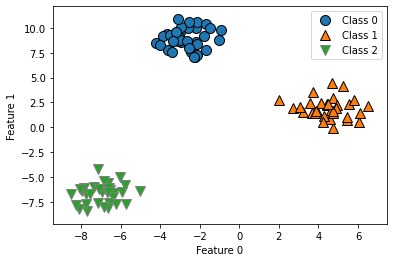

In [67]:
from sklearn.datasets import make_blobs

X, y= make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1', 'Class 2'])


In [68]:
linear_svm  = LinearSVC().fit(X, y)
print('Coefficient shape: ', linear_svm.coef_.shape)
print('Intercept shape: ', linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


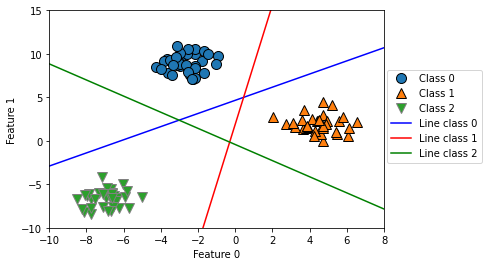

In [71]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
line = np.linspace(-15,15)
for coef , intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r','g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

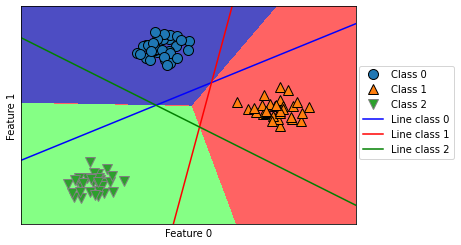

In [73]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
line =np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, [
    'b', 'r','g'
]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1],c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [76]:
X = np.array([[0,1,0,1],[1,0,1,1], [0,0,0,1], [1,0,1,0]])
y=np.array([0,1,0,1])

In [81]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print(f'Feature counts : \n{counts}')

Feature counts : 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


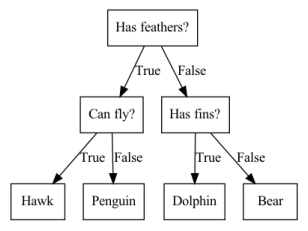

In [84]:
mglearn.plots.plot_animal_tree()

In [85]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train ,X_test, y_train ,y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=42)
tree  = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(f'Accuracy on training set: {tree.score(X_train, y_train):.3f}')
print(f'Accuracy on test set: {tree.score(X_test, y_test):.3f}')

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [86]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train ,y_train )


print(f'Accuracy on training set: {tree.score(X_train, y_train):.3f}')
print(f'Accuracy on test set: {tree.score(X_test, y_test):.3f}')

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [97]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['malignant', 'benign'], feature_names=cancer.feature_names, impurity=True, filled=True)

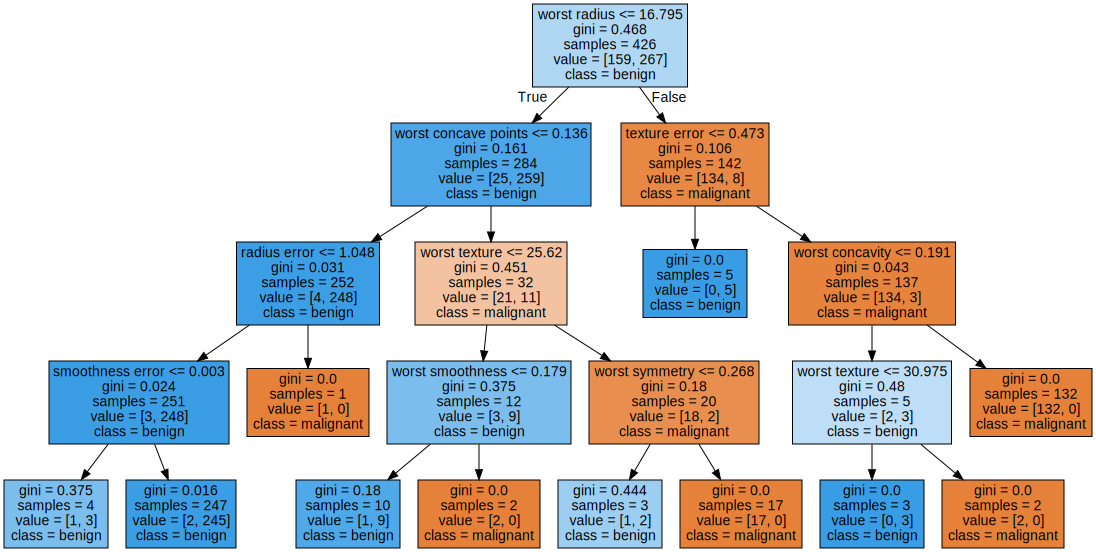

In [98]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [99]:
print(f'Feature importances: \n{tree.feature_importances_}')

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [101]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

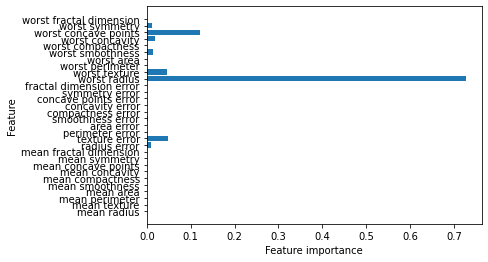

In [102]:
plot_feature_importance_cancer(tree)

Feature importances: [0. 1.]


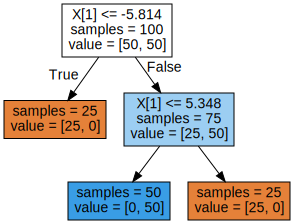

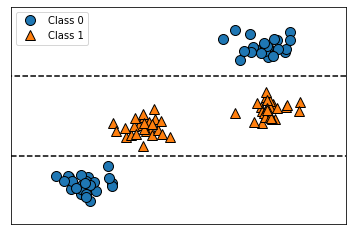

In [103]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $¥Mbyte')

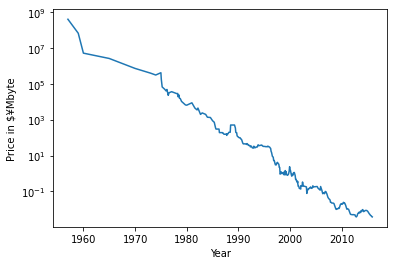

In [105]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $¥Mbyte')

In [108]:
from sklearn.tree import DecisionTreeRegressor

data_train =ram_prices[ram_prices.date  < 2000]
data_test =ram_prices[ram_prices.date  >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree =  tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_2529/2273984150.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_2529/2273984150.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


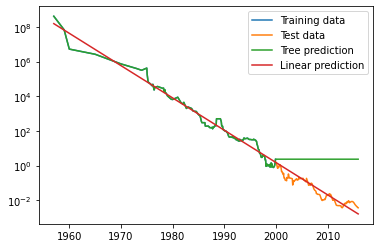

In [114]:
plt.semilogy(data_train.date, data_train.price, label='Training data')
plt.semilogy(data_test.date, data_test.price, label='Test data')
plt.semilogy(ram_prices.date, price_tree, label='Tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='Linear prediction')
plt.legend()

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.75,random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)
forest= RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

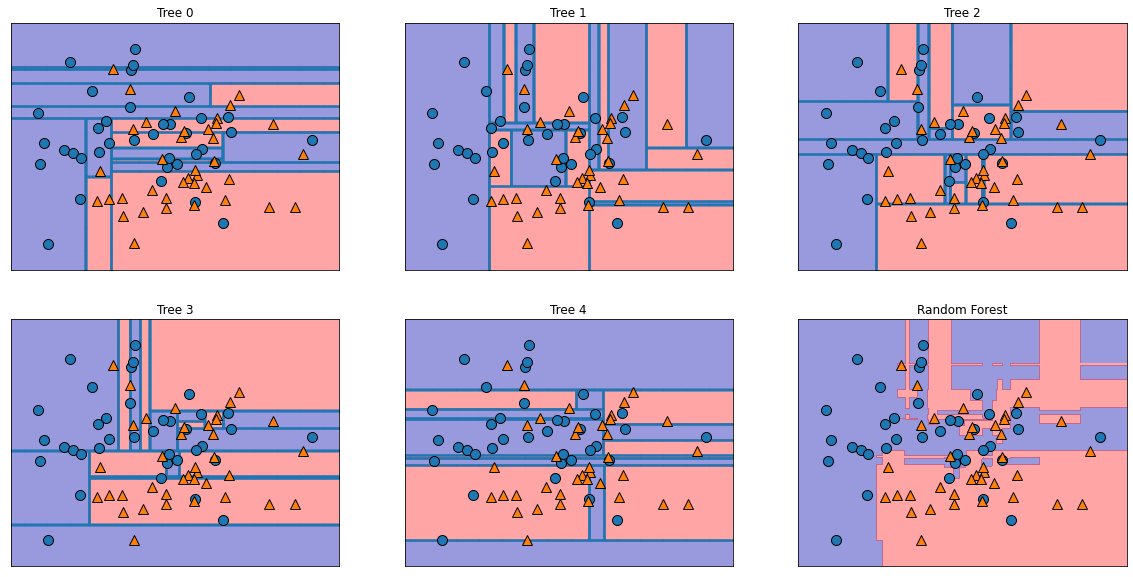

In [120]:
fig, axes = plt.subplots(2, 3,figsize=(20,10))
for i , (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f'Tree {i}')
    mglearn.plots.plot_tree_partition(X_train, y_train, tree , ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [121]:
X_train, X_test, y_train ,y_test  = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print(f'Accuracy on training  set: {forest.score(X_train, y_train)}')
print(f'Accuracy on test  set: {forest.score(X_test, y_test)}')

Accuracy on training  set: 1.0
Accuracy on test  set: 0.972027972027972


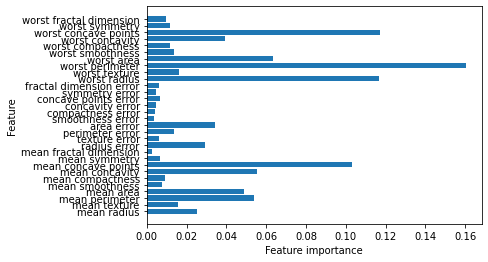

In [122]:
plot_feature_importance_cancer(forest)

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print(f'Accuracy on training set:  {gbrt.score(X_train, y_train)}')
print(f'Accuracy on test set:  {gbrt.score(X_test, y_test)}')

Accuracy on training set:  0.9882629107981221
Accuracy on test set:  0.965034965034965


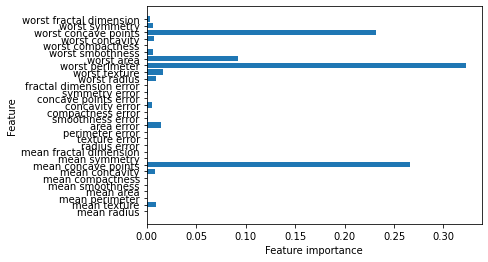

In [131]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importance_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

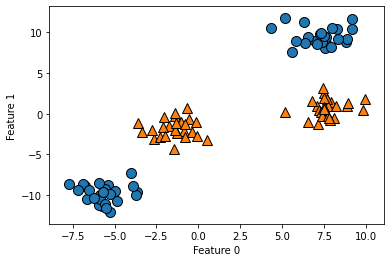

In [132]:
X, y = make_blobs(centers =4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

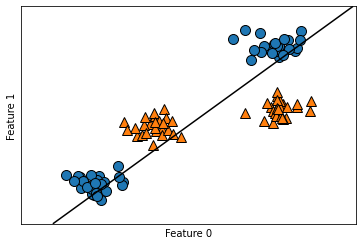

In [133]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_2529/1901837962.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim = -26)


Text(0.5, 0, 'feature1 ** 2')

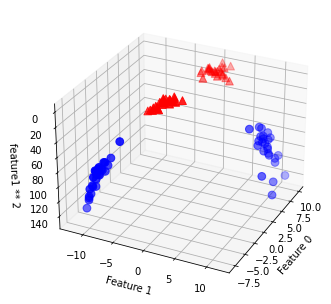

In [134]:
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim = -26)
mask = y ==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('feature1 ** 2')

/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/tl/3mcdykwx5g145dz_cpc1vdxc0000gn/T/ipykernel_2529/837255964.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-46)


Text(0.5, 0, 'feature1 ** 2')

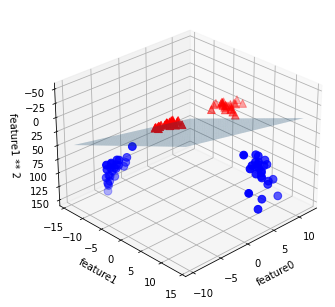

In [167]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-46)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',marker='^', cmap=mglearn.cm2, s=60)

ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')